In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('df_adj.csv')
df.head(10)

,Unnamed: 0,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0
1,1,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0,0
2,2,3,0,0,1,32,0,0,1,1,1,0,3,0,0,0,0,0,0
3,3,12,0,1,1,24,1,1,1,1,1,0,3,0,4,0,0,1,0
4,4,10,1,0,1,58,0,0,0,1,1,0,3,3,3,0,0,1,0
5,5,10,0,1,1,29,1,0,1,1,0,0,1,0,0,1,0,0,0
6,6,9,0,0,1,30,0,0,1,0,1,0,2,0,0,0,0,0,0
7,7,10,1,0,1,30,1,0,1,1,1,0,1,0,0,0,0,0,0
8,8,7,1,0,1,26,0,0,0,1,1,0,3,0,15,0,0,1,0
9,9,8,1,1,1,28,0,0,1,0,1,0,2,2,1,0,0,0,0


In [3]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
METRIC = 'jaccard'
PM = pdist(df, metric = METRIC)
PM = squareform(PM).round(2)
PM

array([[0.  , 0.77, 0.67, ..., 0.64, 0.69, 0.62],
       [0.77, 0.  , 0.56, ..., 0.93, 0.64, 0.85],
       [0.67, 0.56, 0.  , ..., 0.86, 0.6 , 0.83],
       ...,
       [0.64, 0.93, 0.86, ..., 0.  , 0.86, 0.69],
       [0.69, 0.64, 0.6 , ..., 0.86, 0.  , 0.75],
       [0.62, 0.85, 0.83, ..., 0.69, 0.75, 0.  ]])

In [4]:
dimension = np.shape(PM)
dimension

(37652, 37652)

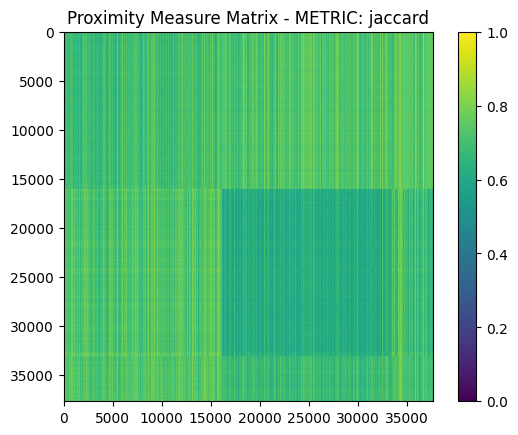

In [5]:
plt.imshow(PM)
plt.title('Proximity Measure Matrix - METRIC: %s' % METRIC)
plt.colorbar()
plt.show()

In [6]:
import gower
df = df.astype('float32')
distance_matrix = gower.gower_matrix(df)
distance_matrix

array([[0.        , 0.30446887, 0.2273588 , ..., 0.35332254, 0.35271186,
        0.32894737],
       [0.30446887, 0.        , 0.0895566 , ..., 0.6051572 , 0.26754123,
        0.4492031 ],
       [0.2273588 , 0.0895566 , 0.        , ..., 0.5631322 , 0.19042854,
        0.4334939 ],
       ...,
       [0.35332254, 0.6051572 , 0.5631322 , ..., 0.        , 0.4779695 ,
        0.29631025],
       [0.35271186, 0.26754123, 0.19042854, ..., 0.4779695 , 0.        ,
        0.29569694],
       [0.32894737, 0.4492031 , 0.4334939 , ..., 0.29631025, 0.29569694,
        0.        ]], dtype=float32)

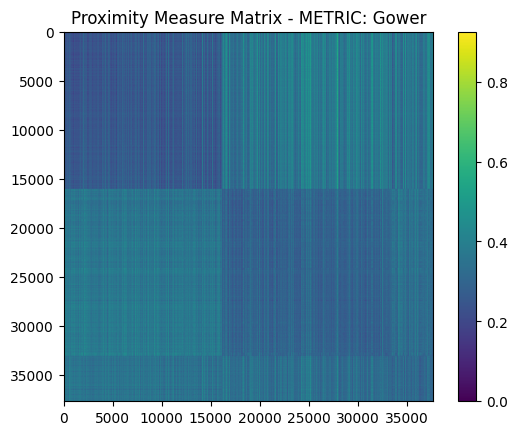

In [7]:
METRIC_GOWER = 'Gower'
plt.imshow(distance_matrix)
plt.title('Proximity Measure Matrix - METRIC: %s' % METRIC_GOWER)
plt.colorbar()
plt.show()

In [8]:
from sklearn.cluster import AgglomerativeClustering
import gower
list_variable = ['Hypertension','Stroke','Diabetes']
df_reduced = df.drop(list_variable, axis = 1)
df = df_reduced.astype('float32')
gower_matrix = gower.gower_matrix(df)
# Perform divisive hierarchical clustering



# CLUSTERING - KMODE - ELBOW METHOD

In [ ]:
from kmodes.kmodes import KModes
from tqdm.auto import tqdm


def KmodesFunctionInit(dataset, VariableToExclude, NumberClusters):
    list_labels = []
    scores = []
    dataset_reduced = dataset.drop(VariableToExclude, axis = 1).astype('float32')

    for nc in tqdm(NumberClusters):
        kmode = KModes(n_clusters = nc, init = 'random', n_init = 100, max_iter = 30, verbose = 1)
        kmode.fit(dataset_reduced)
        list_labels.append(kmode.labels_)
        scores.append(kmode.cost_)

    plt.plot(NumberClusters, scores, marker = 's', color = 'orange')
    plt.xlabel('No. of Clusters')
    plt.ylabel('Scores')
    plt.title('Elbow Plot')
    plt.legend()
    plt.grid()
    plt.show()
    